<a href="https://colab.research.google.com/github/JKeerti11/Tesla-Stock-Price-prediction/blob/main/Tesla_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 📦 Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

In [4]:
# 📁 Load Dataset (Upload your Tesla.csv or mount GDrive if needed)
from google.colab import files
df = pd.read_csv('/content/Tesla.csv - Tesla.csv.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [5]:
# 🔍 Initial Inspection
print(df.shape)
df.info()
print(df.isnull().sum())

(1692, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB
Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64


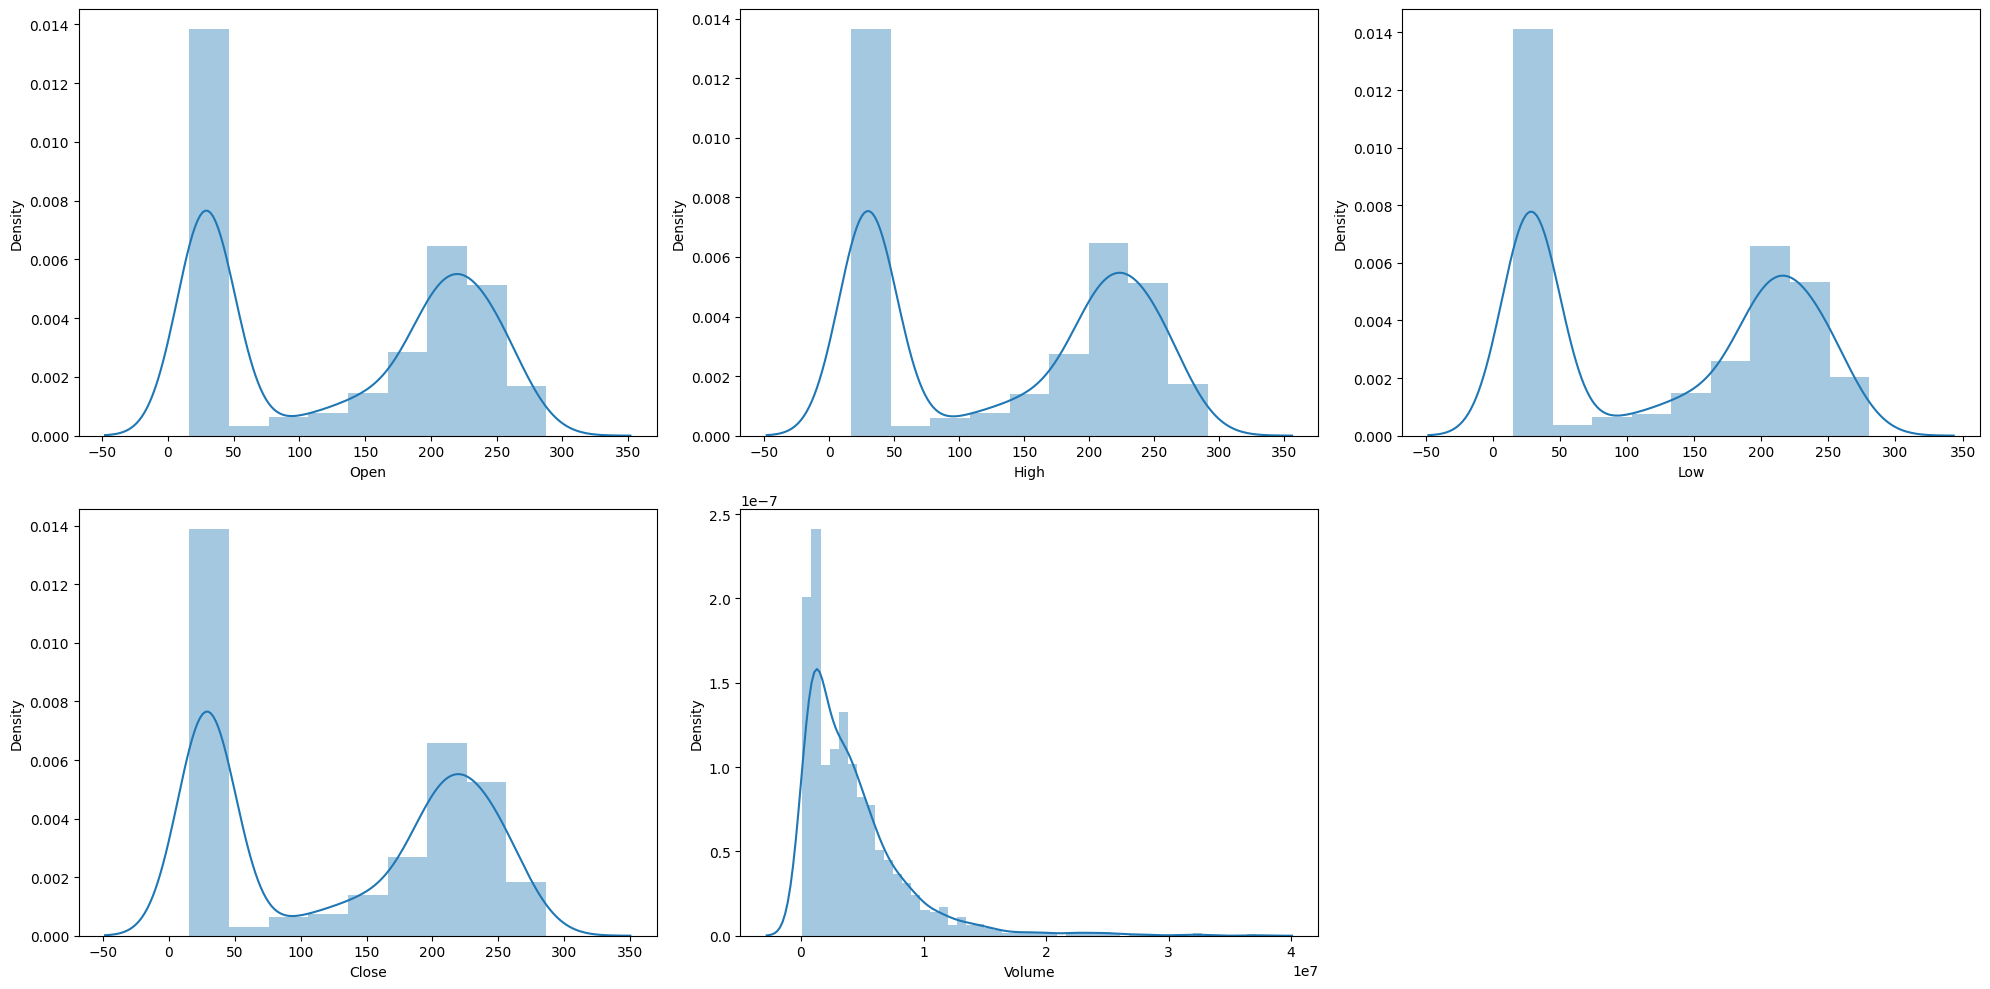

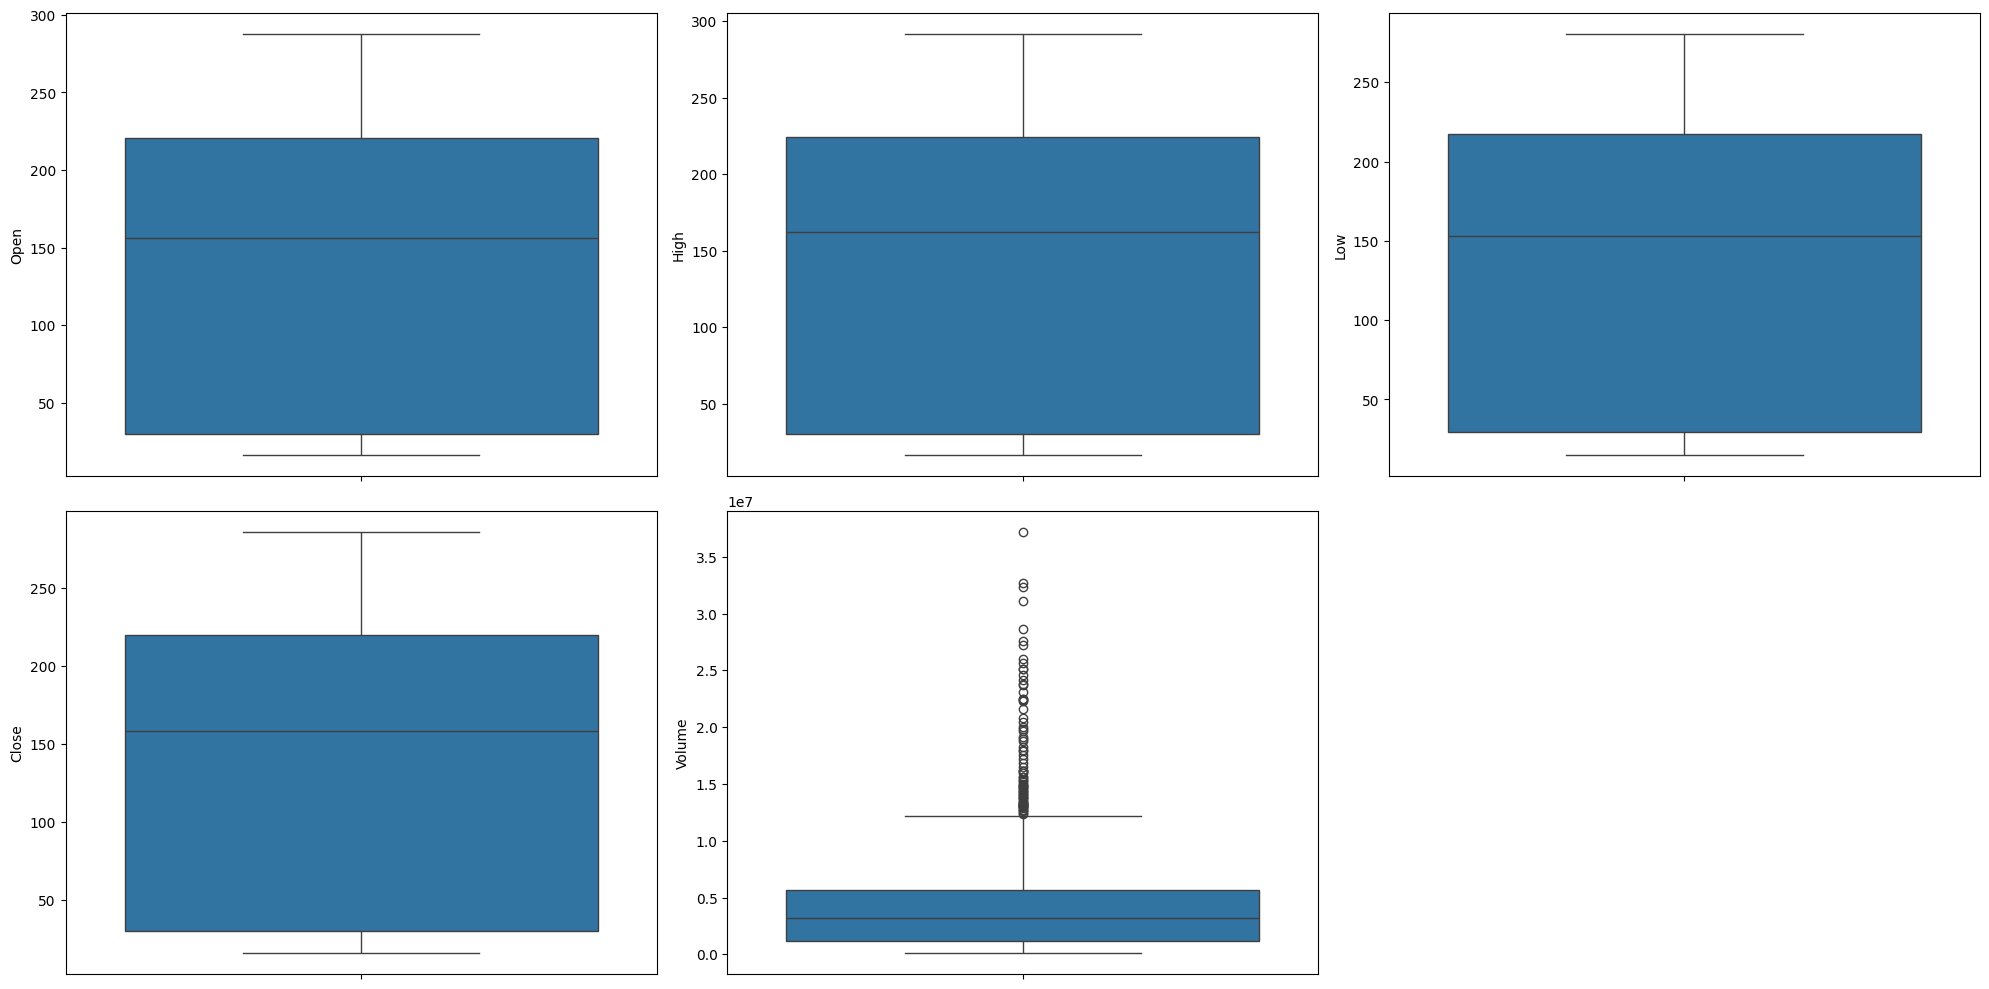

In [6]:
# 📊 Visualizations
features = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.figure(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()

plt.figure(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sb.boxplot(y=df[col])
plt.tight_layout()
plt.show()

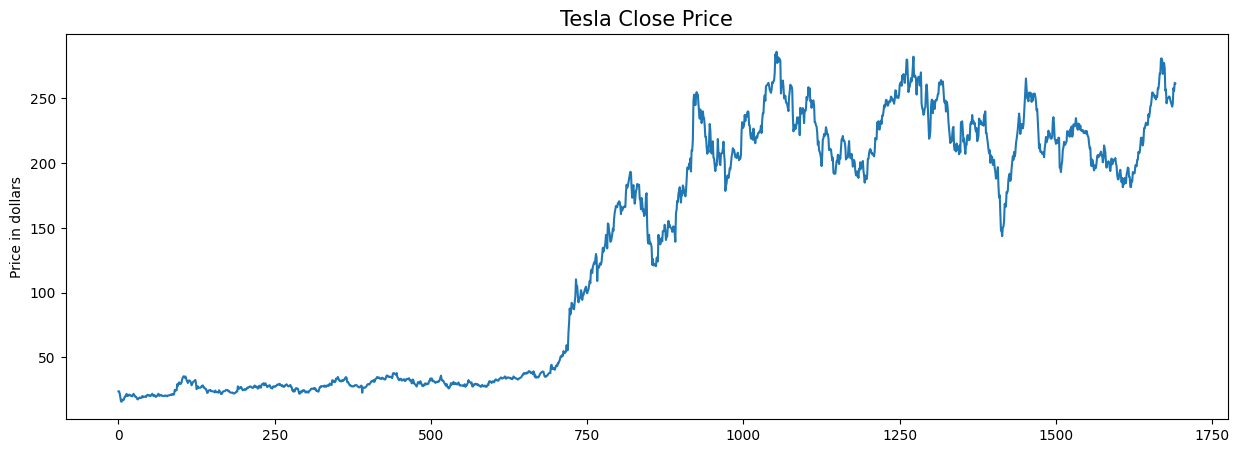

In [7]:
# 📈 Close Price Over Time
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close Price', fontsize=15)
plt.ylabel('Price in dollars')
plt.show()

In [8]:
# 🛠 Feature Engineering
df['Date'] = pd.to_datetime(df['Date'])
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['is_quarter_end'] = np.where(df['month'] % 3 == 0, 1, 0)

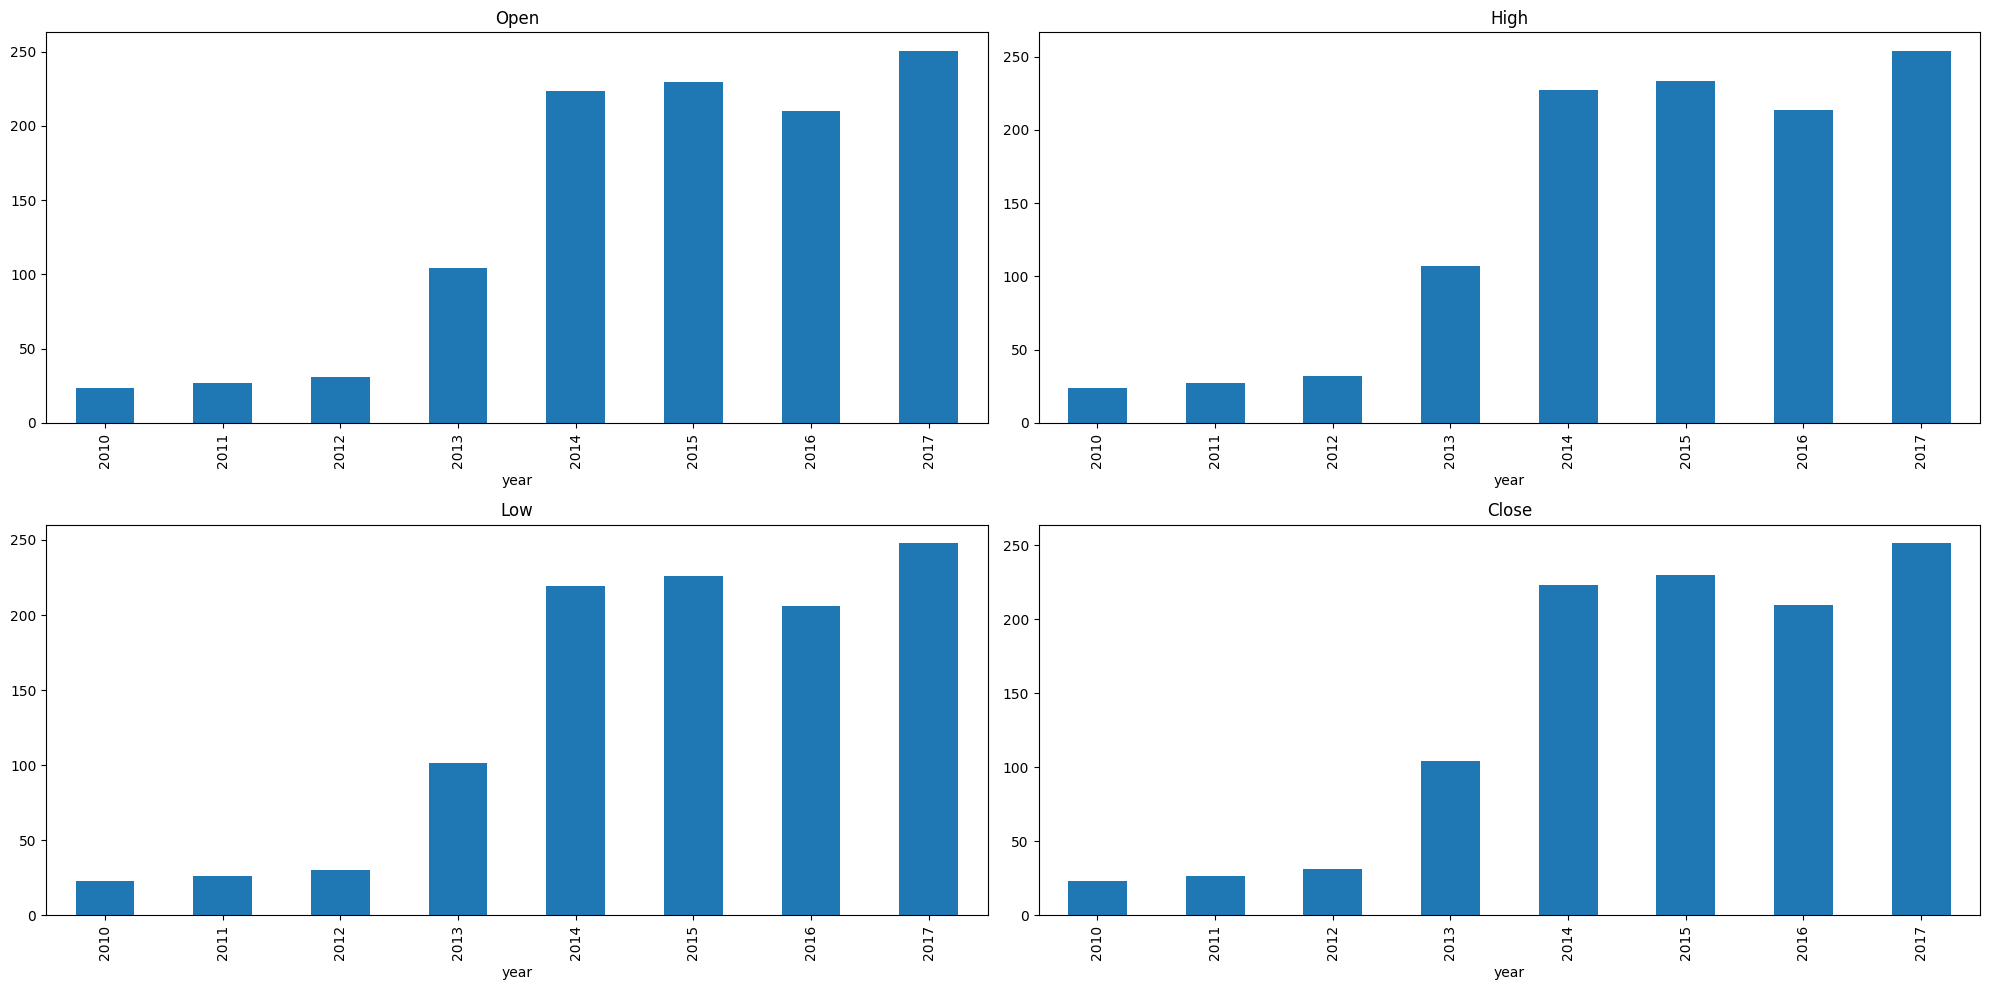

In [9]:
# Group by Year
data_grouped = df.groupby('year').mean(numeric_only=True)
plt.figure(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar(title=col)
plt.tight_layout()
plt.show()

In [10]:
# 🎯 Create Target and Derived Features
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

In [11]:

# 🔤 Encode Categorical Features
le = LabelEncoder()
for col in ['month', 'is_quarter_end']:
    df[col] = le.fit_transform(df[col])

In [12]:
# 🧪 Data Splitting
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=2022)


In [13]:
# ⚙️ Model Training and Evaluation
models = [
    LogisticRegression(),
    SVC(kernel='poly', probability=True),
    XGBClassifier(eval_metric='logloss')
]

for model in models:
    model.fit(X_train, y_train)
    train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:,1])
    test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print(f"\n🔍 {model.__class__.__name__}")
    print(f"Training ROC-AUC: {train_auc:.4f}")
    print(f"Validation ROC-AUC: {test_auc:.4f}")


🔍 LogisticRegression
Training ROC-AUC: 0.5191
Validation ROC-AUC: 0.5441

🔍 SVC
Training ROC-AUC: 0.4887
Validation ROC-AUC: 0.4679

🔍 XGBClassifier
Training ROC-AUC: 0.9645
Validation ROC-AUC: 0.5730


In [14]:
# 🌳 Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_tree)
cv_score = cross_val_score(tree_model, features, target, cv=5)

print("\n🌳 Decision Tree Classifier")
print("Accuracy:", accuracy * 100)
print("Cross-Validation Score:", np.mean(cv_score) * 100)


🌳 Decision Tree Classifier
Accuracy: 52.94117647058824
Cross-Validation Score: 48.939100382258985
